## Word and Text analysis of comments on reddit.com/r/singapore 

Teo Wen Lin

This report explores common words used in discussions on the r/singapore reddit forum, and attempts grouping of various threads/posts into clusters.

Last run on 7 December 2020

In [1]:
import time
from selenium import webdriver
from bs4 import BeautifulSoup
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import PIL
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [2]:
# Visit reddit.com/r/singapore home page using selenium to obtain links to each post

def getsoup(url):     
    driver = webdriver.Chrome()
    driver.get(url)
    time.sleep(10)
    data = driver.page_source
    driver.close()
    soup = BeautifulSoup(data, "html.parser")
    return soup

In [3]:
url = "https://www.reddit.com/r/singapore/top/?t=month"
# /top sorts the posts on the reddit singapore home page by most upvoted
# if this program is run periodically, sort by New may be more appropriate
# t=month gets the posts for the whole month

soup = getsoup(url)

In [4]:
# Get all hrefs from home page using bs4 

posts = soup.find_all('a', {'data-click-id': 'body'})

urls = []
for post in posts:
    current_url = post.get("href")
    urls.append( "https://www.reddit.com" + current_url + "?sort=confidence")

print(*urls,sep="\n")

https://www.reddit.com/r/singapore/comments/jqac15/here_is_my_mom_standing_next_to_an_ad_of_herself/?sort=confidence
https://www.reddit.com/r/singapore/comments/jz81vs/old_is_gold_miss_the_old_packaging/?sort=confidence
https://www.reddit.com/r/singapore/comments/k012zr/thank_you/?sort=confidence
https://www.reddit.com/r/singapore/comments/jwedq0/i_ate_a_mcspicy_and_didnt_lao_sai_emotional/?sort=confidence
https://www.reddit.com/r/singapore/comments/jrzxad/the_event_thay_changed_you/?sort=confidence
https://www.reddit.com/r/singapore/comments/k6f2n6/do_kids_these_days_still_play_with_country_erasers/?sort=confidence
https://www.reddit.com/r/singapore/comments/junen0/why_saw_this_at_plaza_sing_just_why/?sort=confidence
https://www.reddit.com/r/singapore/comments/jsi21i/perks_of_working_till_ungodly_hours/?sort=confidence
https://www.reddit.com/r/singapore/comments/jvoe9i/i_made_a_gta_style_map_of_sentosa/?sort=confidence
https://www.reddit.com/r/singapore/comments/k3ow0d/chinese_fluent/

In [5]:
def cut_soup(list_a):
    for string in list_a:
        if "More posts from the" in string:
            return (" ".join(list_a[0:((list_a.index(string))+1)])) 
            break

In [6]:
# Go to every post and store text in a list

alltext = {}
i = 0

for page in urls:    
    driver = webdriver.Chrome()
    page_soup = getsoup(page)
    page_data = page_soup.prettify().splitlines()
    list1 = []
    for line in page_data:
        list1.append(line)
    cleanresults = cut_soup(list1)
    # Convert the cleaned post into bs4 object
    clean_results = BeautifulSoup(cleanresults)
    # Getting only the text 
    p_title = clean_results.find('h1')
    p_text = clean_results.find_all('p')# Note that this cuts up different paragraphs, even if in a single post
    # p_text = p_text[1:]  # removes duplicate of the original post's content
    text1 = {'title': '', 'body': []}
    text1['title'] = p_title.get_text().strip()
    for p in p_text:
        text1['body'].append(p.get_text().strip())
    alltext["thread" + str(i)] = text1
    i += 1

In [7]:
# Print first thread - check that it's complete
alltext["thread0"]
# Seems like it does not capture posts with negative scores - could be because negative posts are hidden by reddit

{'title': 'Here is my mom standing next to an ad of herself in Bedok MRT',
 'body': ['Pretty cool',
  'r/PimpYourMomForKarma',
  'how she get chosen to be in ad?',
  "The company is part of the community chest and also she's been working there for 10 years so you know...",
  'Do you get to keep that poster? Would be cool to frame it at home',
  'Wow she really looks like a generic mum. For a sec, I thought it was my mum',
  'its OUR mom',
  'Same for me.',
  "Wait I'm Indian...",
  'PROTECT MUMS AT ALL COSTS',
  'lmao, a future in stock imagery awaits her',
  'Martha?',
  'She looks proud haha cute',
  'She DOES look very dignified. Type cast.',
  'it’s all nice and sweet but there’s that annoying beijing 101 ad which has the voice box playing it’s tune at that corridor which subtly ruins my morning everytime i travel for work 😡',
  'YES IT IS FKING ANNOYING I want to rip that voice box out!!!',
  '65588-101',
  'BEIJING 101',
  '65588-101',
  'BEIJING 101',
  '65588-101',
  'BEIJING 1

In [8]:
# Print first 10 titles
j = 0
for thread in alltext:
    print(str(j))
    print(alltext[thread]['title'])
    j += 1
    if j >= 10:
        break

0
Here is my mom standing next to an ad of herself in Bedok MRT
1
Old is gold, miss the old packaging
2
Thank you!
3
i ate a mcspicy and didnt lao sai (emotional)
4
The event thay changed you
5
Do kids these days still play with country erasers...?
6
Why. Saw this at Plaza Sing, just why.
7
Perks of working till ungodly hours 😔
8
I made a GTA style map of Sentosa
9
Chinese: Fluent


In [9]:
# Print first 3 lines in body of first 10 threads
k = 0
for thread in alltext:
    print(str(k))
    print(alltext[thread]['body'][0:3])
    k += 1
    if k >= 10:
        break

0
['Pretty cool', 'r/PimpYourMomForKarma', 'how she get chosen to be in ad?']
1
['nostalgic', 'remembered that i kept buying those in pri sch days', "My parents didn't allow me to buy at that time (Primary School). So I sat at one side and saw the others drinking it happily......"]
2
["Just feeling sad for him coz he's probably not gonna get tipped for delivering soggy food...", 'I would, even if its just 2 dollars. Especially on rainy days and/or if they deliver by bicycle- i was a food delivery rider years ago too so i know how underappreciated they can be', 'Concur']
3
['sorry for any mistakes, english is my first language but im literally crying and shaking right now so i cant type properly.', 'prologue', "this saturday i went to mcdonalds to get lunch. after thinking for a while, i decide to get a mcspicy despite the risk of violent liquid shits because it's saturday. so i order my meal and go to the counter to pay. the guy in front of me takes 15min and i have no idea wtf he's do

In [10]:
# Add each thread's text (title and all comments in body) into a single string
# To be used for text analysis later
threadtext = {}
k = 0
for thread in alltext:
    threadtext[thread] = alltext[thread]['title'] + " " + ' '.join([line for line in alltext[thread]['body']])
    k += 1

In [11]:
# Convert all free text into single list of tokens

words = []
for thread in threadtext:
    tokens = word_tokenize(threadtext[thread])
    words.extend(tokens) 

In [12]:
print(len(words))

53642


In [13]:
# Find number of unique tokens
unique = set(words)
print("No. of unique tokens: ", len(unique))
print("Average frequency of tokens: ", len(words)/len(unique))
print(sorted(unique)[:30])

No. of unique tokens:  7786
Average frequency of tokens:  6.889545337785769
['!', '#', '$', '%', '&', "'", "''", "'S", "'Woah", "'You", "'cheat", "'common", "'d", "'explain", "'fluent", "'food", "'friendly", "'he", "'improved", "'ll", "'longest", "'m", "'minority", "'native", "'natively", "'normal", "'nothing", "'proper", "'re", "'rumour"]


In [14]:
# Find tokens which only appear once
single=[w for w in unique if len(w) == 1 ]
print("No. of single character tokens: ", len(single))
print(single[0:40]) # lots of emojis, some chinese characters. 
# To incorporate these somehow in future as they carry useful information

No. of single character tokens:  113
[',', '❤', '>', '😡', 'i', 'd', 't', '😜', '🙃', '?', '😏', '😝', '🤔', '👠', '!', 'B', '！', "'", 'R', '6', 'm', '0', '’', '[', '😩', '😞', '9', 'J', 'g', '🤩', '”', 'e', 'E', '&', '👍', '😄', ';', 'T', 'U', '😢']


In [15]:
# remove punctuations
words_nop = [w for w in words if w not in string.punctuation + "\"'`'...’“”``'''"]
print("Before punctuation removal: ", words[:50])
print("After punctuation removal: ", words_nop[:50])
print("No. of tokens before removing punctuation: ", len(words))
print("No. of tokens after removing punctuation: ", len(words_nop))
print("No. of unique tokens after removing punctuation: ", len(set(words_nop)))

Before punctuation removal:  ['Here', 'is', 'my', 'mom', 'standing', 'next', 'to', 'an', 'ad', 'of', 'herself', 'in', 'Bedok', 'MRT', 'Pretty', 'cool', 'r/PimpYourMomForKarma', 'how', 'she', 'get', 'chosen', 'to', 'be', 'in', 'ad', '?', 'The', 'company', 'is', 'part', 'of', 'the', 'community', 'chest', 'and', 'also', 'she', "'s", 'been', 'working', 'there', 'for', '10', 'years', 'so', 'you', 'know', '...', 'Do', 'you']
After punctuation removal:  ['Here', 'is', 'my', 'mom', 'standing', 'next', 'to', 'an', 'ad', 'of', 'herself', 'in', 'Bedok', 'MRT', 'Pretty', 'cool', 'r/PimpYourMomForKarma', 'how', 'she', 'get', 'chosen', 'to', 'be', 'in', 'ad', 'The', 'company', 'is', 'part', 'of', 'the', 'community', 'chest', 'and', 'also', 'she', "'s", 'been', 'working', 'there', 'for', '10', 'years', 'so', 'you', 'know', 'Do', 'you', 'get', 'to']
No. of tokens before removing punctuation:  53642
No. of tokens after removing punctuation:  47772
No. of unique tokens after removing punctuation:  7752


In [16]:
# Convert all characters to lower case
words_lower = [w.lower() for w in words_nop]
print(words_lower[:50])
len(set(words_lower))

['here', 'is', 'my', 'mom', 'standing', 'next', 'to', 'an', 'ad', 'of', 'herself', 'in', 'bedok', 'mrt', 'pretty', 'cool', 'r/pimpyourmomforkarma', 'how', 'she', 'get', 'chosen', 'to', 'be', 'in', 'ad', 'the', 'company', 'is', 'part', 'of', 'the', 'community', 'chest', 'and', 'also', 'she', "'s", 'been', 'working', 'there', 'for', '10', 'years', 'so', 'you', 'know', 'do', 'you', 'get', 'to']


6791

In [17]:
# stopwords list 
stop_words = list(stopwords.words('english'))

# Add custom words to stopwords 
stop_words.extend(["'ve", "'m", "'ll", "'re", "'t", "'s", "n't", "a", "'d","would", "reddit", "redditor", "subreddit", "singapore", "singaporeans"])
print(stop_words)
len(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

194

In [18]:
# Remove stopwords from words
words_nostop = [w for w in words_lower if w not in stop_words]
print(words_nostop[:50])
print("No. of tokens(before stopword removal): ", len(words_lower))
print("No. of tokens(after stopword removal): ", len(words_nostop))

['mom', 'standing', 'next', 'ad', 'bedok', 'mrt', 'pretty', 'cool', 'r/pimpyourmomforkarma', 'get', 'chosen', 'ad', 'company', 'part', 'community', 'chest', 'also', 'working', '10', 'years', 'know', 'get', 'keep', 'poster', 'cool', 'frame', 'home', 'wow', 'really', 'looks', 'like', 'generic', 'mum', 'sec', 'thought', 'mum', 'mom', 'wait', 'indian', 'protect', 'mums', 'costs', 'lmao', 'future', 'stock', 'imagery', 'awaits', 'martha', 'looks', 'proud']
No. of tokens(before stopword removal):  47772
No. of tokens(after stopword removal):  24329


In [19]:
# remove numbers
words_nonum = [w for w in words_nostop if not w.isnumeric()]
print("No. of tokens(after removing numbers): ", len(words_nonum))

No. of tokens(after removing numbers):  24012


In [20]:
# Find most common words
print(FreqDist(words_nonum).most_common(50))

[('like', 220), ('one', 192), ('people', 162), ('time', 143), ('still', 124), ('get', 122), ('work', 111), ('even', 111), ('good', 98), ('think', 94), ('also', 91), ('really', 91), ('got', 90), ('school', 89), ('know', 85), ('ns', 81), ('see', 80), ('go', 77), ('much', 71), ('make', 69), ('life', 69), ('shit', 67), ('actually', 65), ('many', 65), ('back', 65), ('years', 64), ('want', 64), ('always', 62), ('could', 61), ('remember', 60), ('take', 60), ('first', 60), ('well', 58), ('mcspicy', 58), ('us', 56), ('use', 56), ('chinese', 56), ('way', 54), ('day', 52), ('lol', 51), ('need', 50), ('country', 50), ('never', 50), ('say', 49), ('experience', 49), ('used', 49), ('regulars', 48), ('though', 46), ('someone', 46), ('feel', 45)]


In [21]:
# Stemming using Porter Stemmer
porter = nltk.PorterStemmer()
words_porter = [porter.stem(w) for w in words_nonum] 
for w0, w1 in zip(words_nonum[:20], words_porter[:20]):
    print("{:15s}{:15s}".format(w0, w1))

mom            mom            
standing       stand          
next           next           
ad             ad             
bedok          bedok          
mrt            mrt            
pretty         pretti         
cool           cool           
r/pimpyourmomforkarmar/pimpyourmomforkarma
get            get            
chosen         chosen         
ad             ad             
company        compani        
part           part           
community      commun         
chest          chest          
also           also           
working        work           
years          year           
know           know           


In [22]:
len(set(words_porter))

5108

In [23]:
# Lemmatization
wnl = nltk.WordNetLemmatizer()
words_lem = [wnl.lemmatize(w) for w in words_nonum]
for w0, w1 in zip(words_nonum[:20], words_lem[:20]):
    print("{:15s}{:15s}".format(w0, w1))

mom            mom            
standing       standing       
next           next           
ad             ad             
bedok          bedok          
mrt            mrt            
pretty         pretty         
cool           cool           
r/pimpyourmomforkarmar/pimpyourmomforkarma
get            get            
chosen         chosen         
ad             ad             
company        company        
part           part           
community      community      
chest          chest          
also           also           
working        working        
years          year           
know           know           


## Generate word cloud for all words in dataset

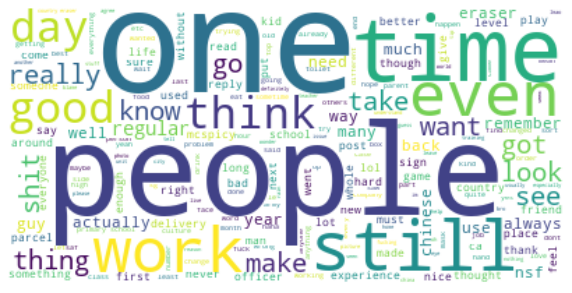

In [24]:
# Generate word cloud image
words_stemmed = " ".join(words_lem)
wc = WordCloud(background_color="white").generate(words_stemmed)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

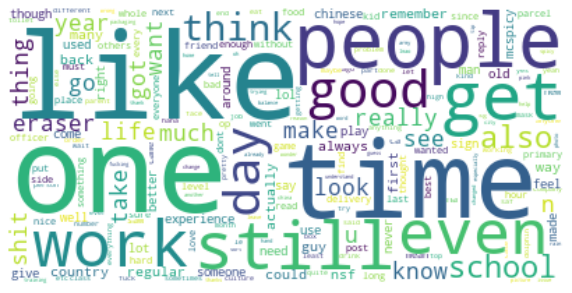

In [25]:
# Generate from frequency
wc2 = WordCloud(background_color="white")
wc2.generate_from_frequencies(nltk.FreqDist(words_lem))
plt.figure(figsize=(10,8))
plt.imshow(wc2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Reason for the slight differences between the 2 word clouds above:
# - parameters in WordCloud function include a built-in stopwords list, which could include words like "like"

## Generate word clouds for top 5 posts


Post title: Here is my mom standing next to an ad of herself in Bedok MRT


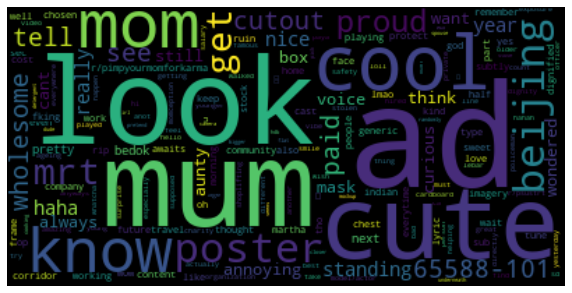

Post title: Old is gold, miss the old packaging


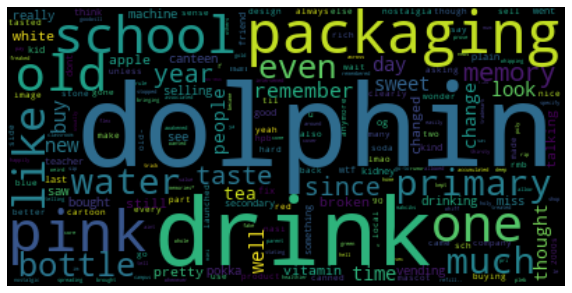

Post title: Thank you!


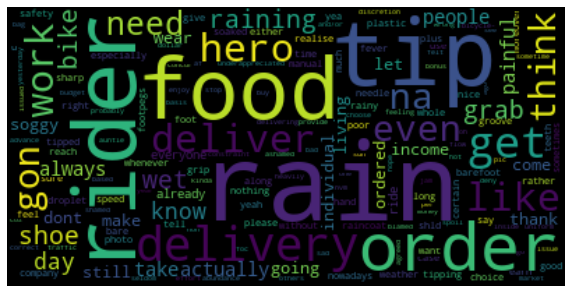

Post title: i ate a mcspicy and didnt lao sai (emotional)


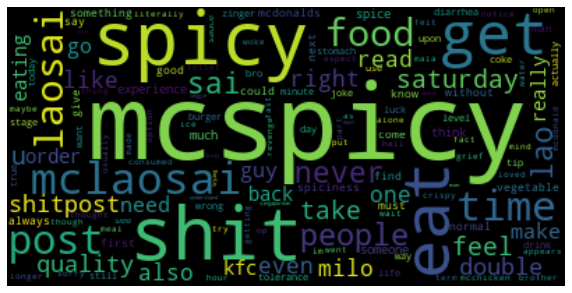

Post title: The event thay changed you


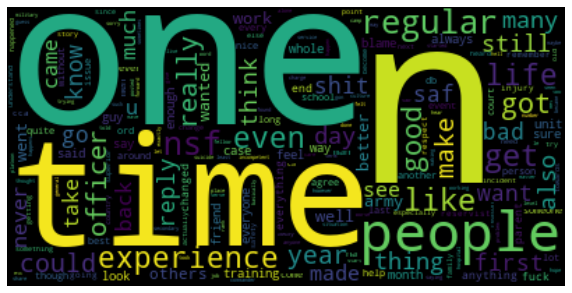

In [26]:
keys1 = ['thread0', 'thread1', 'thread2', 'thread3', 'thread4']
for key in keys1:
    threadtext2 = alltext[key]['title'] + " " + ' '.join([line for line in alltext[key]['body']])
    
    # Convert free text into tokens
    words2 = word_tokenize(threadtext2)
    
    # Remove punctuation
    words_nop2 = [w for w in words2 if w not in string.punctuation + "\"'`'...’“”``'''"]
    
    # Convert all characters to lower case
    words_lower2 = [w.lower() for w in words_nop2]

    # Remove stopwords from words
    words_nostop2 = [w for w in words_lower2 if w not in stop_words]
    
    # remove numbers
    words_nonum2 = [w for w in words_nostop2 if not w.isnumeric()]
    
    # lemmatize words
    words_lem2 = [wnl.lemmatize(w) for w in words_nonum2]
    print("Post title: " + alltext[key]['title'])
    
    # Generate wordcloud from frequency
    wc2 = WordCloud(background_color="black")
    wc2.generate_from_frequencies(nltk.FreqDist(words_lem2))
    plt.figure(figsize=(10,8))
    plt.imshow(wc2, interpolation='bilinear')
    plt.axis("off")
    plt.show()

## Text Analysis of posts - Clustering

In [27]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn import metrics

In [28]:
keys1 = ['thread0', 'thread1']
for key in keys1:
    threadtext2 = [alltext[key]['title'] + " " + ' '.join([line for line in alltext[key]['body']])]
    vec_tf = CountVectorizer()
    tf = vec_tf.fit_transform(threadtext2)
    print(vec_tf.get_feature_names()[0:20])
    # print(tf)

['10', '101', '65588', 'about', 'actor', 'actually', 'ad', 'again', 'age', 'ageing', 'all', 'also', 'always', 'amazing', 'an', 'and', 'annoying', 'anot', 'another', 'anyways']
['20', '2000s', '2010s', '60', '80c', '90s', 'about', 'accumulated', 'across', 'actual', 'actually', 'addicted', 'advertiser', 'after', 'ago', 'ain', 'aint', 'all', 'allow', 'allowed']


In [29]:
print(tf)

  (0, 324)	16
  (0, 232)	25
  (0, 188)	1
  (0, 291)	3
  (0, 467)	71
  (0, 340)	21
  (0, 311)	1
  (0, 384)	1
  (0, 466)	21
  (0, 238)	1
  (0, 72)	2
  (0, 477)	1
  (0, 228)	17
  (0, 362)	2
  (0, 405)	2
  (0, 112)	3
  (0, 299)	15
  (0, 341)	1
  (0, 120)	3
  (0, 18)	1
  (0, 281)	8
  (0, 485)	33
  (0, 71)	5
  (0, 39)	5
  (0, 482)	4
  :	:
  (0, 490)	1
  (0, 177)	1
  (0, 508)	1
  (0, 126)	1
  (0, 27)	1
  (0, 378)	1
  (0, 241)	3
  (0, 443)	2
  (0, 501)	1
  (0, 270)	1
  (0, 128)	1
  (0, 86)	1
  (0, 117)	1
  (0, 339)	1
  (0, 92)	1
  (0, 154)	1
  (0, 515)	1
  (0, 174)	1
  (0, 476)	1
  (0, 296)	1
  (0, 163)	1
  (0, 14)	1
  (0, 192)	1
  (0, 552)	1
  (0, 165)	1


In [30]:
# convert to an array
tf_a = tf.toarray()
tf_a

array([[ 2,  2,  1,  1,  1,  3,  9,  1,  1,  1,  1,  1,  1,  3,  1,  1,
         1,  3,  1,  1,  1,  2,  2,  2,  1, 25,  1,  1,  2,  1,  1,  4,
         1,  4,  1,  1,  5,  2,  1,  5,  1,  1,  1,  1,  1,  2,  1,  1,
         1,  5,  1,  1,  3,  2,  2,  1,  1,  2,  1,  8,  1,  3,  1,  1,
         1,  1,  4,  1,  1,  1,  7,  5,  2,  1,  2,  1,  1,  4,  2,  1,
         2,  1,  1,  1,  2,  1,  1,  4,  4,  1,  1,  1,  1,  2,  1,  1,
         1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,
         3,  1,  1,  1,  3,  1,  1,  3,  3,  1,  1,  1,  1,  1,  1, 23,
         1,  5,  1,  3,  1,  1, 17,  3,  4,  1,  1,  1,  1,  1,  1,  1,
         2,  1,  1,  1,  1,  1,  9,  2,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  3,  1,  1,  1,  1,  1,  5,  1,  1,  1,
         1,  1,  2,  1,  5,  1,  1,  1,  1,  3,  1,  1,  1,  2,  3,  1,
         1,  1,  1,  1,  1,  6,  1,  2,  2,  7,  2,  1,  1,  1,  4,  1,
         1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  6, 

In [31]:
# stopword removal
vec_tf_3 = CountVectorizer(stop_words='english')
tf_3 = vec_tf_3.fit_transform(threadtext2)
print(tf_3)

  (0, 253)	16
  (0, 146)	1
  (0, 231)	3
  (0, 260)	21
  (0, 246)	1
  (0, 301)	1
  (0, 184)	1
  (0, 47)	2
  (0, 280)	2
  (0, 321)	2
  (0, 83)	3
  (0, 261)	1
  (0, 91)	3
  (0, 14)	1
  (0, 46)	5
  (0, 377)	4
  (0, 281)	10
  (0, 322)	14
  (0, 318)	1
  (0, 319)	3
  (0, 104)	3
  (0, 155)	1
  (0, 159)	1
  (0, 425)	2
  (0, 37)	3
  :	:
  (0, 350)	1
  (0, 67)	1
  (0, 190)	1
  (0, 382)	1
  (0, 138)	1
  (0, 396)	1
  (0, 96)	1
  (0, 295)	1
  (0, 187)	3
  (0, 351)	2
  (0, 392)	1
  (0, 213)	1
  (0, 98)	1
  (0, 58)	1
  (0, 88)	1
  (0, 259)	1
  (0, 64)	1
  (0, 119)	1
  (0, 402)	1
  (0, 135)	1
  (0, 374)	1
  (0, 235)	1
  (0, 11)	1
  (0, 150)	1
  (0, 422)	1


In [32]:
# tfidf indexing
vec_tfidf = TfidfVectorizer() #min_df = 2)
tfidf = vec_tfidf.fit_transform(threadtext2)
print(tfidf)

  (0, 165)	0.007610561655440784
  (0, 552)	0.007610561655440784
  (0, 192)	0.007610561655440784
  (0, 14)	0.007610561655440784
  (0, 163)	0.007610561655440784
  (0, 296)	0.007610561655440784
  (0, 476)	0.007610561655440784
  (0, 174)	0.007610561655440784
  (0, 515)	0.007610561655440784
  (0, 154)	0.007610561655440784
  (0, 92)	0.007610561655440784
  (0, 339)	0.007610561655440784
  (0, 117)	0.007610561655440784
  (0, 86)	0.007610561655440784
  (0, 128)	0.007610561655440784
  (0, 270)	0.007610561655440784
  (0, 501)	0.007610561655440784
  (0, 443)	0.015221123310881568
  (0, 241)	0.022831684966322353
  (0, 378)	0.007610561655440784
  (0, 27)	0.007610561655440784
  (0, 126)	0.007610561655440784
  (0, 508)	0.007610561655440784
  (0, 177)	0.007610561655440784
  (0, 490)	0.007610561655440784
  :	:
  (0, 482)	0.030442246621763137
  (0, 39)	0.03805280827720392
  (0, 71)	0.03805280827720392
  (0, 485)	0.2511485346295459
  (0, 281)	0.06088449324352627
  (0, 18)	0.007610561655440784
  (0, 120)	0.0

In [33]:
tfidf.toarray()[:10, :20]

array([[0.01522112, 0.01522112, 0.00761056, 0.00761056, 0.00761056,
        0.02283168, 0.06849505, 0.00761056, 0.00761056, 0.00761056,
        0.00761056, 0.00761056, 0.00761056, 0.02283168, 0.00761056,
        0.00761056, 0.00761056, 0.02283168, 0.00761056, 0.00761056]])

In [34]:
def pre_process(text):
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in string.punctuation + "\"'`'...’“”``'''"]
    # remove numbers
    tokens = [t for t in tokens if not t.isnumeric()]
    # lowercase
    tokens = [wnl.lemmatize(t.lower()) for t in tokens]
    # remove stopwords
    tokens = [t for t in tokens if t not in stop_words]
    # join tokens into single string
    text_after_process=" ".join(tokens)
    return(text_after_process)

In [35]:
docs = pd.DataFrame.from_dict(threadtext, orient = 'index', columns = ['text']) 
  
docs2 = docs['text'].apply(pre_process) 

In [36]:
docs.head()

text
thread0  Here is my mom standing next to an ad of herse...
thread1  Old is gold, miss the old packaging nostalgic ...
thread2  Thank you! Just feeling sad for him coz he's p...
thread3  i ate a mcspicy and didnt lao sai (emotional) ...
thread4  The event thay changed you As the topic sugges...

In [37]:
docs2.head()

thread0    mom standing next ad bedok mrt pretty cool r/p...
thread1    old gold miss old packaging nostalgic remember...
thread2    thank feeling sad coz probably gon na get tipp...
thread3    ate mcspicy didnt lao sai emotional sorry mist...
thread4    event thay changed topic suggest event changed...
Name: text, dtype: object

In [38]:
# Create tfidf matrix
vectorizer = TfidfVectorizer(max_df=0.7, max_features=2500,
                             min_df=3, stop_words = stop_words,
                             use_idf=True)
X = vectorizer.fit_transform(docs2)
X.shape

(25, 1164)

In [39]:
print(X)

  (0, 141)	0.0482681118343684
  (0, 188)	0.0514860886760074
  (0, 98)	0.05995038691618942
  (0, 874)	0.04548057350123202
  (0, 1066)	0.05995038691618942
  (0, 371)	0.05529214745013658
  (0, 448)	0.05529214745013658
  (0, 280)	0.04548057350123202
  (0, 742)	0.05995038691618942
  (0, 1055)	0.03883268370261845
  (0, 991)	0.02855197702086798
  (0, 458)	0.0514860886760074
  (0, 362)	0.03235803579499716
  (0, 659)	0.033798298419411
  (0, 611)	0.11058429490027316
  (0, 926)	0.05529214745013658
  (0, 78)	0.04302179043582538
  (0, 774)	0.05995038691618942
  (0, 853)	0.05529214745013658
  (0, 136)	0.03534534147130505
  (0, 50)	0.05995038691618942
  (0, 264)	0.05995038691618942
  (0, 1017)	0.03235803579499716
  (0, 23)	0.0514860886760074
  (0, 603)	0.03235803579499716
  :	:
  (24, 298)	0.04871495777983029
  (24, 997)	0.05829935506383998
  (24, 443)	0.035114481592224106
  (24, 1125)	0.03664004523342385
  (24, 655)	0.035114481592224106
  (24, 1001)	0.06260907789524632
  (24, 494)	0.0626090778952463

In [40]:
# Divide the 25 posts into 3 clusters
#‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
# max_iter: Maximum number of iterations of the k-means algorithm for a single run.

km3 = KMeans(n_clusters=3, init='k-means++', max_iter=2000)
km3.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [41]:
# Evaluate the 3 clusters 
# Coefficient: more similar within clusters, more distant between clusters
# The higher the better (-1 to 1)
# value near 0 indicates overlapping clusters

print("Coefficient for 3 clusters: %0.3f"
      % metrics.silhouette_score(X, km3.labels_))

Coefficient for 3 clusters: 0.016


In [42]:
print(km3.labels_)

docs['labels3'] = km3.labels_

[1 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 1 0]


In [43]:
labels, counts = np.unique(km3.labels_[km3.labels_>=0], return_counts=True)
print (labels)
print (counts)

[0 1 2]
[20  2  3]


In [44]:
# What each cluster is about

def print_terms(cm, num):
    original_space_centroids = cm.cluster_centers_
    order_centroids = original_space_centroids.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names()
    for i in range(num):
        print("Cluster %d:" % i, end='')
        for ind in order_centroids[i, :50]:
            print(' %s' % terms[ind], end='')
        print()


print_terms(km3, 3)

Cluster 0: school work day chinese mask go even nice shit use back chicken take life old food eye really year love way much thing guy hour void country na deck around face tip little map post many thanks new remember come feel light shot primary long intern give first play drink
Cluster 1: ad cute market mum wet cool level mom next american standard proud mrt even centre paid oh http finally doe age photo haha voice especially tell aunty mask curious nice year standing wow lmao shopping hawker reminded upon intended covid department doesnt spoil road somebody yep say remember box cant
Cluster 2: sign game toilet door open bring bos enter floor shall problem pas challenge put mission wet mean lmao someone read art hong kong asian hk ah block meme accepted dog go singaporean office picture set work solution sing plaza much fun area though come pay modern say asia law forget


In [45]:
# Now divide the 25 posts into 4 clusters

km4 = KMeans(n_clusters=4, init='k-means++', max_iter=2000)
km4.fit(X)
print("Coefficient for 4 clusters: %0.3f"
      % metrics.silhouette_score(X, km4.labels_))
print(km4.labels_)

docs['labels4'] = km4.labels_

Coefficient for 4 clusters: 0.009
[2 2 1 1 1 2 1 1 2 2 0 2 3 1 1 2 1 0 3 3 3 1 0 3 3]


In [46]:
labels4, counts4 = np.unique(km4.labels_[km4.labels_>=0], return_counts=True)
print (labels4)
print (counts4)

[0 1 2 3]
[3 9 7 6]


In [47]:
print_terms(km4, 4)

Cluster 0: mask eye face open bring door sign toilet mean small asian ah bos problem someone use meme paper office turn put wide book sad nobody many towards fine dead algorithm curious wearing pay meeting ur im say could real wear app closed www point looked come lmao dont free card
Cluster 1: work life hour shit tip even long intern food go day guy sign order thing nsf first year take eat really experience wet toilet wild cute read com http balance post give na never deliver man back much someone meeting sort must worker ha already come watch way grab country
Cluster 2: school chinese game ad cool map primary play packaging star remember drink mum pink sign country box day class 30 teacher dog yes use back cute old vibe well go feel memory year even used kid since friend ah mom china hong kong much really english thing dark singaporean light
Cluster 3: chicken nice love little void shot market deck hot thanks photo picture finally looking film pic damn wet miss west new light check w

In [48]:
# Now divide the 25 posts into 5 clusters

km5 = KMeans(n_clusters=5, init='k-means++', max_iter=2000)
km5.fit(X)
print("Coefficient for 5 clusters: %0.3f"
      % metrics.silhouette_score(X, km5.labels_))
print(km5.labels_)

docs['labels5'] = km5.labels_

Coefficient for 5 clusters: 0.021
[4 3 2 2 2 3 1 2 2 0 4 1 2 2 2 3 2 2 2 2 2 2 1 2 2]


In [49]:
labels5, counts5 = np.unique(km5.labels_[km5.labels_>=0], return_counts=True)
print (labels5)
print (counts5)

[0 1 2 3 4]
[ 1  3 16  3  2]


In [50]:
print_terms(km5, 5)

Cluster 0: chinese english school singaporean word china speak language use read sentence even teacher write put level primary standard context used mean using 2nd asked well say without watch able class sub line proper something instead recent example hated industry bright gaming pointing day year name honestly term point never bit
Cluster 1: sign game toilet door open bring bos enter floor shall problem pas challenge put mission wet mean lmao someone read art hong kong asian hk ah block meme accepted dog go singaporean office picture set work solution sing plaza much fun area though come pay modern say asia law forget
Cluster 2: work nice food chicken even shit day life eye love take go market thing void way deck na post little tip hour map wet thanks year really use shot long http intern next many much guy check photo cute around picture new hot eat com could thank first ha op
Cluster 3: school packaging drink primary pink play country 30 remember class day old back kid teacher memo

In [51]:
pd.set_option('display.max_colwidth', None)
docs

text  \
thread0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

Clustering is not very successful as the number of documents is small - coefficients of clusters are very low. 